# Importing the libraries

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset

In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the category names

In [65]:
category_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some examples from the dataset

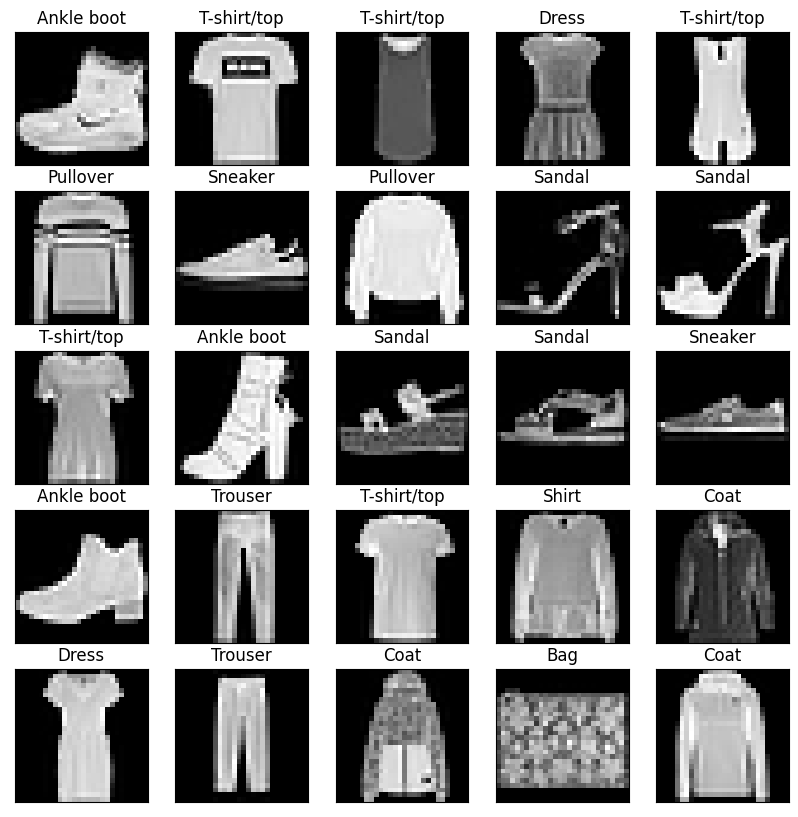

In [56]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_labels[train_labels[i]])
    plt.xticks([])
    plt.yticks([])

# Normalize the pixel values of the input images

In [57]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model architecture

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data

In [60]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5070 - accuracy: 0.8218
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2686 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

# Evaluate the model on the test data

In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3401 - accuracy: 0.8843 - 443ms/epoch - 1ms/step

Test accuracy: 0.8842999935150146


# Make predictions on a few images from the test dataset

In [62]:
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 37ms/step


# Show the images with their predicted labels

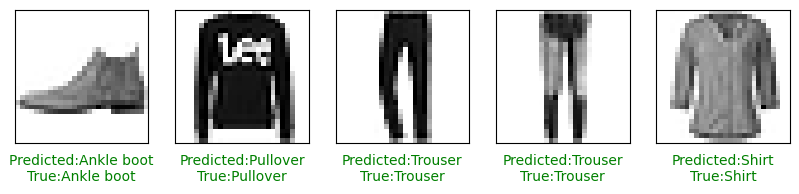

In [70]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted:{category_names[predicted_label]}\nTrue:{category_names[true_label]}", color=color)
plt.show()